# Image Preprocessing
Actually the most important thing I need to learn is how to open and preprocess the image itself. Without it, I cannot input the image into the neural network. I try several libraries to decide which library works best for me.

In [1]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image
import tensorflow as tf

## Basic Preprocessing
I think the most basic tasks of preprocessing image are as follows:
- opening the image (as array)
- displaying the image
- resizing the image

I use matplotlib, PIL and opencv (cv2) for comparison, although I alwasy use matplotlib to display image.

### Matplotlib
This is a very popular library to visualize the data. If this library can also preprocess images, would not it be perfect? I use *imread* function in *image* module in matplotlib to read the image. Then I display the image using *pyplot*.

From the matplotlib [documentation](https://matplotlib.org/2.0.0/users/image_tutorial.html), I read that matplotlib only supports PNG file. However, from my example below, I can read jpg image just fine.

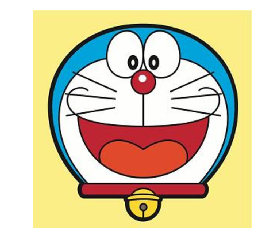

In [2]:
image = mpimg.imread('doraemon.jpg')
plt.axis('off')
plt.imshow(image);

The image is automaticall converted into the numpy array which is very convenient.

In [3]:
image

array([[[255, 248, 153],
        [255, 248, 153],
        [255, 248, 153],
        ..., 
        [255, 249, 168],
        [255, 253, 171],
        [255, 255, 173]],

       [[254, 245, 150],
        [254, 245, 150],
        [254, 245, 150],
        ..., 
        [253, 246, 165],
        [255, 250, 169],
        [255, 253, 171]],

       [[250, 242, 144],
        [250, 242, 144],
        [250, 242, 144],
        ..., 
        [250, 243, 162],
        [253, 246, 165],
        [255, 248, 167]],

       ..., 
       [[251, 238, 134],
        [251, 238, 134],
        [251, 238, 134],
        ..., 
        [252, 242, 145],
        [255, 245, 148],
        [255, 246, 151]],

       [[251, 238, 134],
        [251, 238, 134],
        [251, 238, 134],
        ..., 
        [252, 242, 145],
        [255, 245, 148],
        [255, 246, 151]],

       [[251, 238, 134],
        [251, 238, 134],
        [251, 238, 134],
        ..., 
        [252, 242, 145],
        [255, 245, 148],
        [255, 246,

In [4]:
image.shape

(596, 600, 3)

New problem arises. *image* module in matplotlib has a functionality to resize the image, but that functionality is limited to the PNG, SVG or PDF image output. Not a very good library to use.

In [5]:
mpimg.thumbnail('doraemon.jpg', 'output.jpg')

ValueError: Can only handle extensions 'png', 'svg' or 'pdf'

### PIL
This library is very popular in terms of image preprocessing, maybe for its simplicity. I use *Image.open* to open the image and then I display the image.

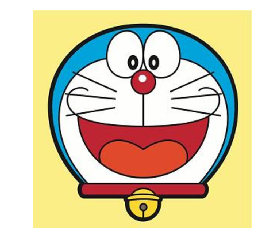

In [6]:
image = Image.open('doraemon.jpg')
plt.axis('off')
plt.imshow(image);

Actually, I don't need matplotlib to display the image, since 'image' variable is still in the image form (shown below). To get the array representation, use *getdata*.

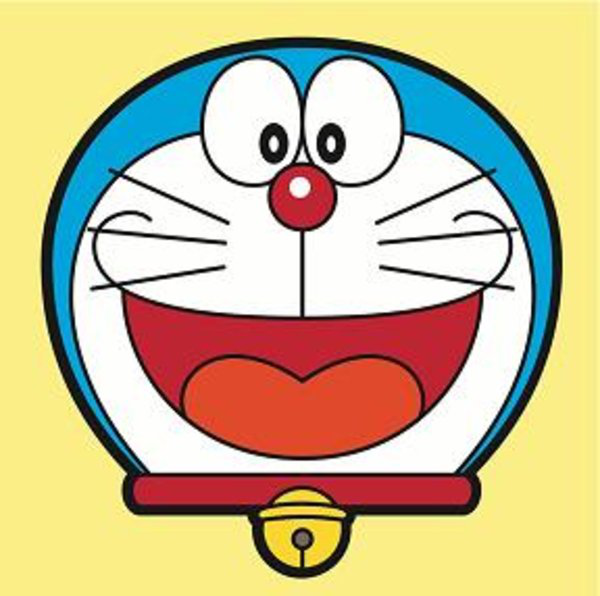

In [7]:
image

In [8]:
np.array(image.getdata())

array([[255, 248, 153],
       [255, 248, 153],
       [255, 248, 153],
       ..., 
       [252, 242, 145],
       [255, 245, 148],
       [255, 246, 151]])

Resizing the image is very easy in PIL. Just use *resize* functionality. The new image size and the method of resizing can be chosen freely. I try several resizing methods below. I'm not sure which one is the best, but I'm sure *Nearest Neighbor* method is the worst.

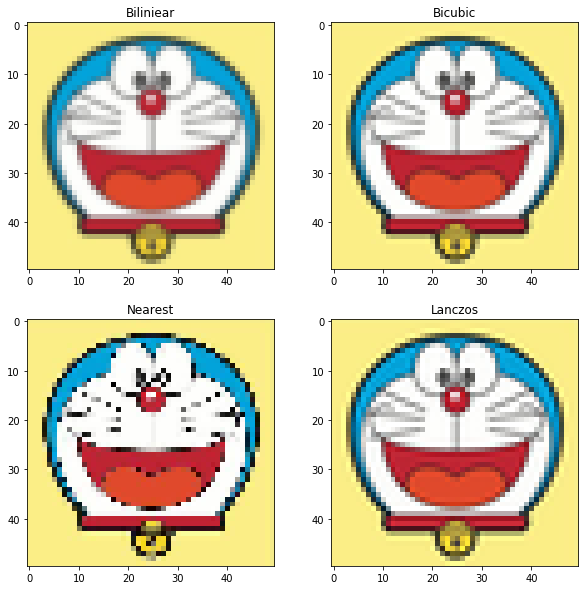

In [9]:
image_linear = image.resize(size=(50,50), resample=Image.BILINEAR)
image_cubic = image.resize(size=(50,50), resample=Image.BICUBIC)
image_nearest = image.resize(size=(50,50), resample=Image.NEAREST)
image_lanczos = image.resize(size=(50,50), resample=Image.LANCZOS)
f, axarr = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
axarr[0,0].imshow(image_linear);
axarr[0,0].set_title('Biliniear');
axarr[0,1].imshow(image_cubic);
axarr[0,1].set_title('Bicubic');
axarr[1,0].imshow(image_nearest);
axarr[1,0].set_title('Nearest');
axarr[1,1].imshow(image_lanczos);
axarr[1,1].set_title('Lanczos');
f.subplots_adjust(hspace=0.2)

### OpenCV
I want to try using OpenCV but I think it is very complex. I found several issues in reading and displaying the image. First, the pixel read from OpenCV is different from the actual image. Second, seems like there is something wrong with my installation (using miniconda), so I cannot use the default display function in OpenCV.

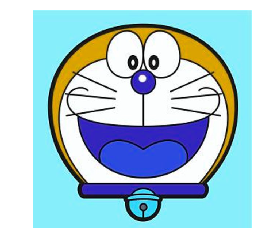

In [10]:
image = cv.imread('doraemon.jpg')
plt.axis('off')
plt.imshow(image);

In [11]:
cv.imshow('image', image)

error: /tmp/build/80754af9/opencv_1512680317074/work/modules/highgui/src/window.cpp:611: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


### Tensorflow
Tensorflow is my favorite library for neural network (honestly, for everything!). It is very powerful library for research because it can do simply anything, although it is very difficult to use.

Below is the code to read image. So many lines just for reading an image! Yes, it's complex, but it is able to read many images in one process. Just put all the image filenames in the *string_input_producer*. The result from below code is the image tensor.

In [12]:
filename = tf.train.string_input_producer(['doraemon.jpg'])
reader = tf.WholeFileReader()
key, value = reader.read(filename)
images = tf.image.decode_jpeg(value, channels=3)

In [13]:
images

<tf.Tensor 'DecodeJpeg:0' shape=(?, ?, 3) dtype=uint8>

To get the array representation, *Coordinator* and *Queue_runners* are necessary. Displaying the image is simple if the array representation has been obtained.

In [14]:
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    image = images.eval()

    coord.request_stop()
    coord.join(threads)

In [15]:
image

array([[[255, 248, 150],
        [255, 248, 150],
        [255, 248, 150],
        ..., 
        [254, 249, 167],
        [255, 252, 170],
        [255, 254, 172]],

       [[254, 246, 148],
        [254, 246, 148],
        [254, 246, 148],
        ..., 
        [252, 247, 165],
        [255, 250, 168],
        [255, 252, 170]],

       [[250, 242, 144],
        [250, 242, 144],
        [250, 242, 144],
        ..., 
        [250, 244, 160],
        [253, 247, 163],
        [255, 249, 165]],

       ..., 
       [[250, 237, 133],
        [250, 237, 133],
        [250, 237, 133],
        ..., 
        [252, 242, 145],
        [253, 245, 147],
        [254, 246, 148]],

       [[250, 237, 133],
        [250, 237, 133],
        [250, 237, 133],
        ..., 
        [252, 242, 145],
        [253, 245, 147],
        [254, 246, 148]],

       [[250, 237, 133],
        [250, 237, 133],
        [250, 237, 133],
        ..., 
        [252, 242, 145],
        [253, 245, 147],
        [254, 246,

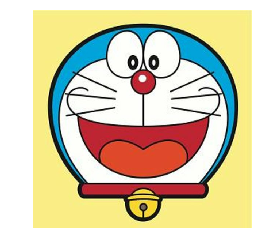

In [16]:
plt.axis('off')
plt.imshow(image);

Resizing the image is quite simple, using *resize_images*. The new size and the method can also be freely chosen. However, the type of the resulting array has to be converted into *uint8* to be displayed with matplotlib.

In [17]:
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    image_linear = tf.image.resize_images(images, [50,50],
                        tf.image.ResizeMethod.BILINEAR).eval()
    image_linear = np.round(image_linear).astype(np.uint8)
    image_nearest = tf.image.resize_images(images, [50,50],
                        tf.image.ResizeMethod.NEAREST_NEIGHBOR).eval()

    coord.request_stop()
    coord.join(threads)

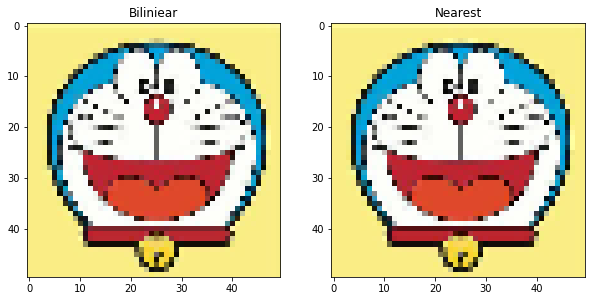

In [18]:
f, axarr = plt.subplots(ncols=2, nrows=1, figsize=(10,10))
axarr[0].imshow(image_linear);
axarr[0].set_title('Biliniear');
axarr[1].imshow(image_nearest);
axarr[1].set_title('Nearest');
f.subplots_adjust(hspace=0.2)

The resulting image is not as good compared to PIL. Maybe this is caused by the rounding and the conversion of type.

## Loading Dataset
Tensorflow contains many useful datasets for practice, namely CIFAR10 and CIFAR100. Loading these datasets is simple using Tensorflow (Keras embedded in Tensorflow, actually). For example, CIFAR100 contains 50k train data and 10k test data. Each image has size of 32x32x3.

In [19]:
data = tf.keras.datasets.cifar100.load_data()
train_data, train_label = data[0]
test_data, test_label = data[1]
print train_data.shape, test_data.shape

(50000, 32, 32, 3) (10000, 32, 32, 3)


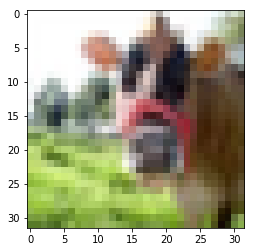

In [20]:
plt.imshow(train_data[0])

In [21]:
train_data[0].shape

(32, 32, 3)

## Conclusion
Preprocessing image is not that difficult. I think choosing the library depends on the tasks in hand. For simple image preprocessing only, PIL would be a great library. However, if the goal is to build neural networks, using Tensorflow directly is preferable.